<a href="https://colab.research.google.com/github/thiagolermen/machine-learning-portifolio/blob/main/src/5-support-vector-machines/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine - SVM

## Imports

In [1]:
import numpy as np
import cvxopt

## Utils

In [2]:
"""
These were (shamelessly) taken from cs231n course github code.
I believe these were coded by Andrej Karpathy so credit goes to him
for coding these.
"""

import numpy as np
import matplotlib.pyplot as plt


def create_dataset(N, D=2, K=2):
    X = np.zeros((N * K, D))  # data matrix (each row = single example)
    y = np.zeros(N * K)  # class labels

    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j

    # lets visualize the data:
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()

    y[y == 0] -= 1

    return X, y


def plot_contour(X, y, svm):
    # plot the resulting classifier
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    points = np.c_[xx.ravel(), yy.ravel()]

    Z = svm.predict(points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # plt the points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()

In [3]:
def linear(x, z):
  return np.dot(x, z.T)

In [4]:
def polynomial(x, z, p=5):
  return (1+np.dot(x, z.T)) ** p

In [5]:
def gaussian(x, z, sigma=0.1):
  return np.exp(-np.linalg.norm(x-z, axis=1)**2 / (2*(sigma**2)))

## SVM class

In [12]:
class SVM():
  def __init__(self, kernel=gaussian, C=1):
    self.kernel = kernel
    self.C = C

  def fit(self, X, y):
    self.X = X
    self.y = y
    m, n = X.shape

    # Calculate the kernel
    self.K = np.zeros((m,m))

    for i in range(m):
      self.K[i, :] = self.kernel(X[i, np.newaxis], self.X)

    P = cvxopt.matrix(np.outer(y,y)*self.K)
    q = cvxopt.matrix(-np.ones((m, 1)))
    G = cvxopt.matrix(np.vstack((np.eye(m)*-1, np.eye(m))))
    h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m)*self.C)))
    A = cvxopt.matrix(y, (1,m), 'd')
    b = cvxopt.matrix(np.zeros(1))
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(P, q, G, h, A, b)
    self.alphas = np.array(sol['x'])


  def predict(self, X):
    y_predict = np.zeros(X.shape[0])
    sv = self.get_parameters(self.alphas)

    for i in range(X.shape[0]):
      y_predict[i] = np.sum(self.alphas[sv]*self.y[sv, np.newaxis]*self.kernel(X[i], self.X[sv])[:, np.newaxis])

    return np.sign(y_predict + self.b)

  def get_parameters(self, alphas):
    threshold = 1e-4

    sv = ((alphas > threshold) * (alphas < self.C)).flatten()
    self.w = np.dot(self.X[sv].T, alphas[sv]*self.y[sv, np.newaxis])
    self.b = np.mean(self.y[sv, np.newaxis] - self.alphas[sv]*self.y[sv, np.newaxis]*self.K[sv, sv][:, np.newaxis])


    return sv


## Test

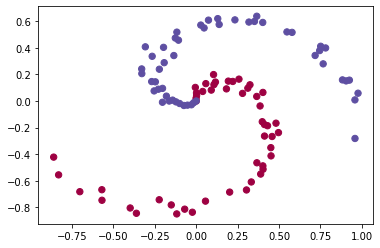


Gaussian: 
Accuracy is: 0.99


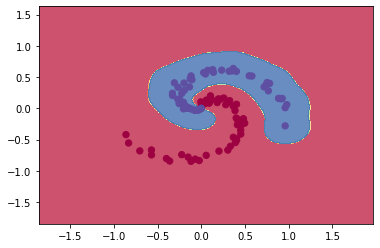


Polynomial: 
Accuracy is: 0.97


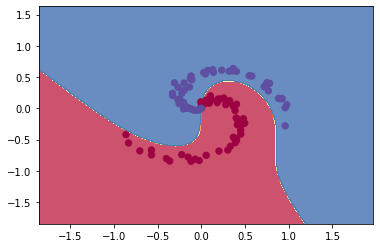


Linear: 
Accuracy is: 0.72


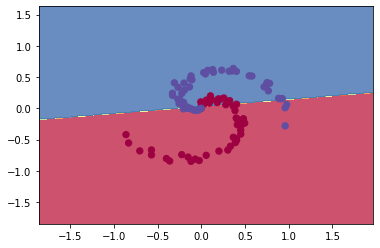

In [16]:
if __name__ == "__main__":
  np.random.seed(1)
  X, y = create_dataset(N=50)

  print("")
  svm = SVM(kernel=gaussian)
  svm.fit(X, y)
  y_pred = svm.predict(X)
  print(f'Gaussian: \nAccuracy is: {sum(y==y_pred)/y.shape[0]}')
  plot_contour(X, y, svm)

  print("")
  svm = SVM(kernel=polynomial)
  svm.fit(X, y)
  y_pred = svm.predict(X)
  print(f'Polynomial: \nAccuracy is: {sum(y==y_pred)/y.shape[0]}')
  plot_contour(X, y, svm)

  print("")
  svm = SVM(kernel=linear)
  svm.fit(X, y)
  y_pred = svm.predict(X)
  print(f'Linear: \nAccuracy is: {sum(y==y_pred)/y.shape[0]}')
  plot_contour(X, y, svm)